# Output Select

This notebook aims to show the usage of the model ``Output``. It can be useful when there are too many output variables and you want to select only a few of them.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import andes


In [2]:
%matplotlib inline

In [3]:
andes.config_logger(stream_level=30)

In [4]:
case = andes.get_case('ieee14/ieee14_full.xlsx')

Add a device ``Output`` to select variable ``Bus.v`` only.

In [5]:
saops = andes.load(case,
                   setup=False,
                   default_config=True,
                   no_output=True)

saops.add('Output', dict(model='Bus', varname='v'))
saops.add('Toggle', dict(model='Line', dev='Line_2', t=1))
saops.setup()

True

As benchmark, this case would output everything.

In [6]:
safull = andes.load(case,
                    setup=False,
                    default_config=True,
                    no_output=True)
safull.add('Toggle', dict(model='Line', dev='Line_2', t=1))
safull.setup()

True

Next, let's run the TDS and export the results to CSV files.

In [7]:
saops.PFlow.run()

saops.TDS.config.no_tqdm = True
saops.TDS.run()

saops.TDS.plt.export_csv('./ieee14_ops_out.csv')

<Toggle Toggle_1>: Line.Line_2 status changed to 0 at t=1.0 sec.


'./ieee14_ops_out.csv'

In [8]:
safull.PFlow.run()

safull.TDS.config.no_tqdm = True
safull.TDS.run()

safull.TDS.plt.export_csv('./ieee14_full_out.csv')

<Toggle Toggle_1>: Line.Line_2 status changed to 0 at t=1.0 sec.


'./ieee14_full_out.csv'

In [9]:
df_full = pd.read_csv('./ieee14_full_out.csv')
df_ops = pd.read_csv('./ieee14_ops_out.csv')

shape_full = df_full.shape
shape_ops = df_ops.shape

print("Without Output, there are {} rows and {} columns".format(shape_full[0], shape_full[1]))
print("With Output, there are {} rows and {} columns".format(shape_ops[0], shape_ops[1]))

Without Output, there are 603 rows and 296 columns
With Output, there are 603 rows and 15 columns


# Replay TDS Simualtion from a CSV file

You can also replay the TDS simulation from a CSV file.

In [10]:
safullr = andes.load(case,
                     setup=True, default_config=True, no_output=True)

safullr.PFlow.run()
safullr.TDS.config.no_tqdm = True

safullr.TDS.run(from_csv='./ieee14_full_out.csv')

True

Remember to add the device ``Output`` when you want to replay the simulation from a partial output file.

In [11]:
saopsr = andes.load(case,
                    setup=False, default_config=True, no_output=True,
                    from_csv='./ieee14_ops_out.csv')

saopsr.add('Output', dict(model='Bus', varname='v'))
saopsr.setup()

saopsr.PFlow.run()

saopsr.TDS.config.no_tqdm = True
saopsr.TDS.run(from_csv='./ieee14_ops_out.csv')

True

As expected, the variables ``Bus.v`` are exactly the same.

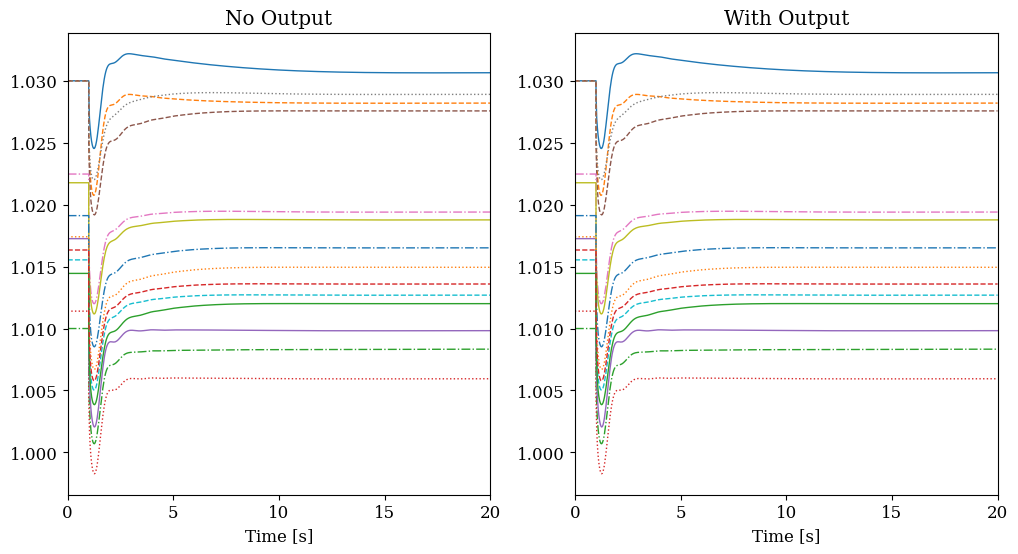

(<Figure size 1200x600 with 2 Axes>,
 <Axes: title={'center': 'With Output'}, xlabel='Time [s]'>)

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

safullr.TDS.plt.plot(safullr.Bus.v,
                     latex=False,
                     show=False,
                     ax=ax[0], fig=fig,
                     title='No Output',)

saopsr.TDS.plt.plot(saopsr.Bus.v,
                    latex=False,
                    ax=ax[1], fig=fig,
                    title='With Output',)